# What is Image Data?

## Course Materials for WashU 5702

# What makes up images?

## Digital images are made up of a mosaic of really small squares called ***pixels***. You can think of them similar to how ancient art was made using mosaic tiles like the image below:
<p style="text-align:center;"><img src="https://www.worldhistory.org/uploads/images/12743.jpg?v=1661607482" width="400" height="500" />

# Images and Matrices

### A digital image is a matrix of pixel values with coordinate system with **rows** and **columns** with the origin in the top left corner and the coordinate values increase going down and right. The value of a pixel gives information about the 'color' of an image. So we see that these units exist within a pixel

### In a binary image (only two values possible) 0 represents black and 1 represents white.  

### In a grayscale image more values are possible. In an 8-bit image, 2^8 or 256 values are possible, so each pixel can have a value between 0 and 255 (256 total values since we're starting from 0 instead of 1). 0 would still represent black, 255 would represent white, and all values in between would be shades of gray. 16-bit and 32-bit images are also common. In those cases 2^16 (65,536) and 2^32 (4,294,967,296) values are possible, respectively.

### Binary images are black and white and grayscale images are shades of gray, so how do we get color images? We'll discuss that further below.

<p style="text-align:center;"><img src="https://iq.opengenus.org/content/images/2020/04/index.png" />  


# Let's explore some image data

## First let's load any python packages we might need for this notebook
### - numpy is a package for working with array/matrix data like images
### - PlantCV is a package with computer vision methods to segmenta and analyze image data
### - matplotlib is a package to plot data into this jupyter notebook

## Help:
- PlantCV - https://plantcv.readthedocs.io/en/stable/
- NumPy - https://numpy.org/doc/stable/

In [1]:
%matplotlib widget
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [2]:
# These are some parameter settings for plotting

pcv.params.debug = "plot"
pcv.params.text_size = 5
pcv.params.text_thickness = 10
pcv.params.line_thickness = 10

# Let's read a gray image into this notebook

## The right-side of the equation is the plantcv function you are calling and any inputs into that function. In this case the input into the function is a path to an image.
## The left-side of the equation are the outputs of this function. You would look at a documentation for a package/software to know what the inputs and outputs of a function are. In this case, there are three outputs for this function: 1) The image matrix; 2) the path to the image; 3) the name of the image.

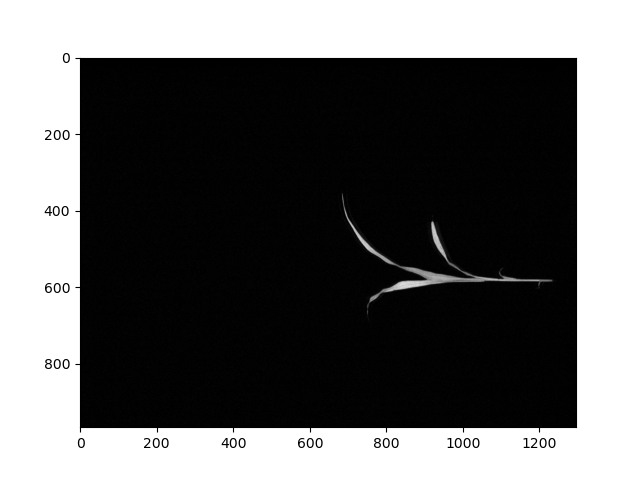

In [4]:
# Read in the image fmax.png

In [5]:
# Let's print out the second and third outputs

./images
fmax.png


In [6]:
# Use the Python type function to determine the data type of the image

numpy.ndarray

# Most common Python image analysis packages store images as NumPy arrays
### [NumPy](https://numpy.org/) is a core package of the scientific Python community.
### We can use NumPy to determine the shape and size of the image. The dimensions are in the order y (rows), x (columns), z (channels) for images.
### We can also determine what type of data is stored in each pixel (dtype).

In [7]:
# Print the image data

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 240   0 ...   0   0   0]
 [  0  90   0 ... 111   0   0]
 [  0  22 134 ... 284   0 136]]


In [8]:
# Determine the shape and size of the image

(966, 1296)

In [9]:
# Determine the data type of the image

dtype('uint16')

In [10]:
# Calculate the minimum value observed in gray_img

0

In [11]:
# Calculate the maximum value observed in gray_img

7084

In [12]:
# Show the value of the pixel in row 580 and column 940 

3935

In [13]:
# Let's plot a histogram of all the values of this image

alt.Chart(...)

# Let's review: What do we know about this image?

# What is pseudocoloring?

## Pseudocoloring is when you map color onto images. In the case of our grayscale image we can assign a colormap to span the range of gray values in our image. Pseudocolor can make it easier to see features within an image.

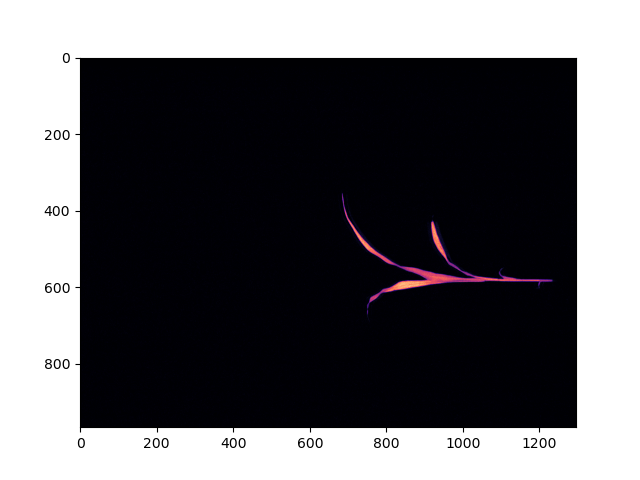

In [14]:
# Plot the image using a different colormap, some options: 'YlGn', 'viridis', 'magma', 'Oranges', 'RdPu'

# How 'big' is the plant in this image? (How many pixels are plant pixels?)

In [15]:
# Let's plot a histogram of all the values of this image

alt.Chart(...)

In [ ]:
# count non-zero pixels

# Is there something wrong with this count?

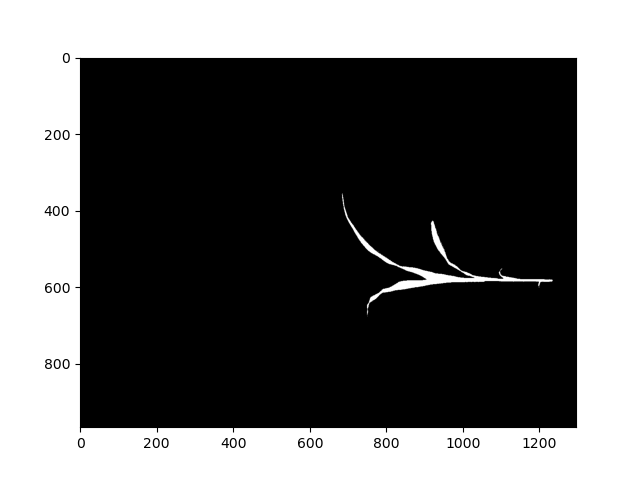

In [17]:
#threshold
bin_img = pcv.threshold.binary(gray_img=gray_img, threshold=1000, object_type="light")

In [18]:
# unique
np.unique(bin_img)

array([  0, 255], dtype=uint16)

In [19]:
np.max(bin_img)

255

In [20]:
np.count_nonzero (bin_img)

11351

# What is a color image?
This is a color image encoded using a Red Green Blue (RGB) color model.
Note that in OpenCV the color order is BGR.

![3D gird](./figures/grid3D.png)


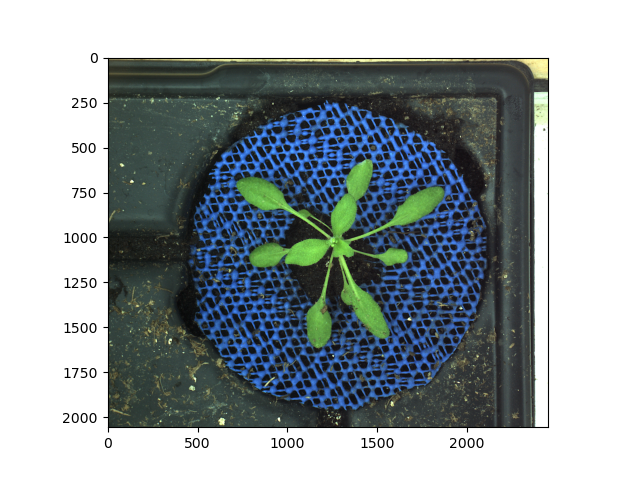

In [21]:
# Read in the image fmax.png
rgb_img, rgb_path, rgb_name = pcv.readimage("./Athaliana.png")

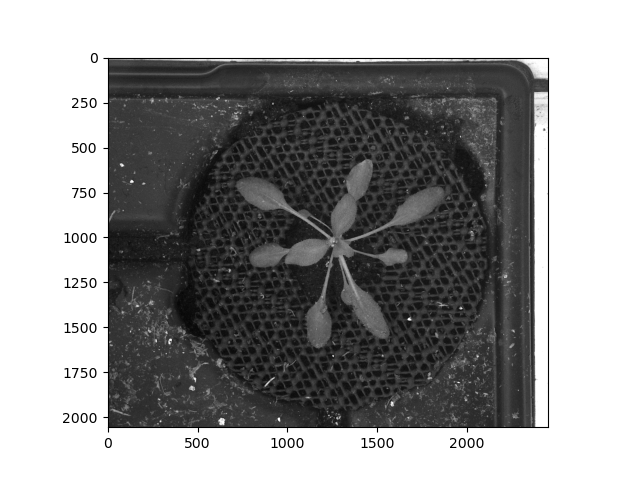

In [24]:
pcv.plot_image(rgb_img[:,:,2])

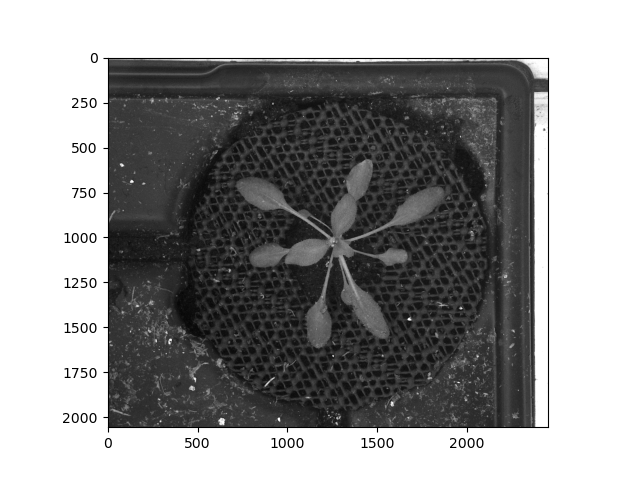

In [24]:
pcv.plot_image(rgb_img[:,:,2])

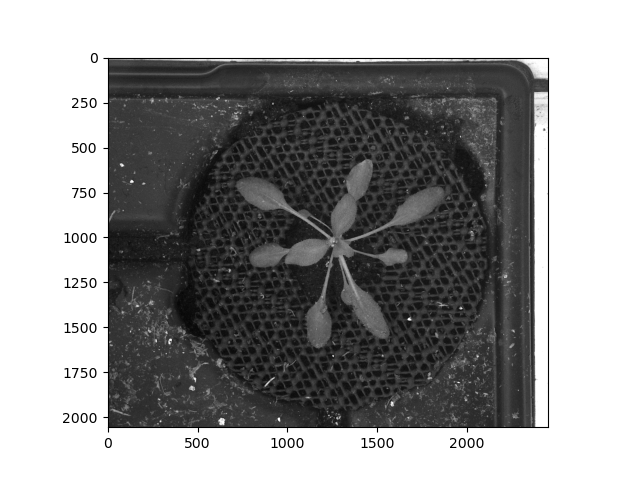

In [24]:
pcv.plot_image(rgb_img[:,:,2])

In [25]:
rgb_img[1500,1500]

array([ 78, 171, 107], dtype=uint8)

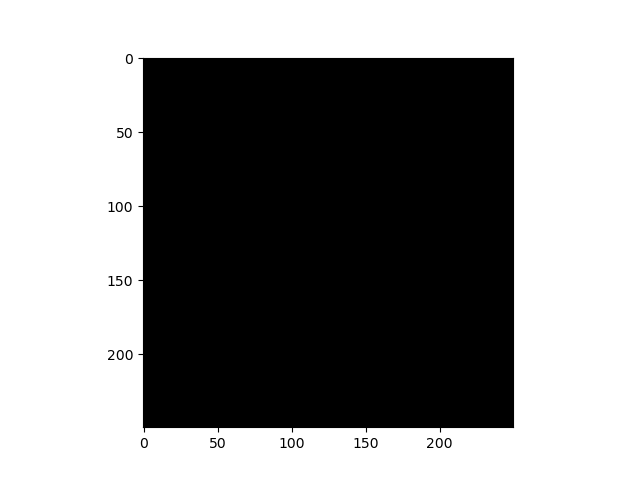

In [26]:
# Create a constant color image:
# Initialization with all values to zero
my_rgb_img = np.zeros((250,250,3), dtype=np.uint8)
pcv.plot_image(my_rgb_img)

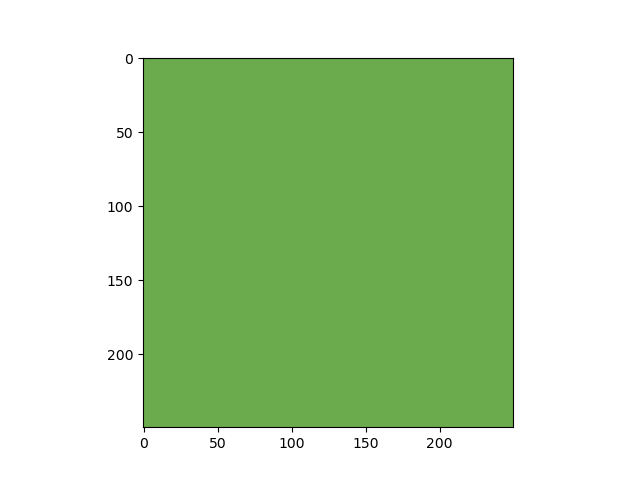

In [27]:
# Create a color image:
# Give a value to each color channel

#https://htmlcolorcodes.com/color-picker/

#78, 171, 107

#B
my_rgb_img[:,:,0] = 78

#G
my_rgb_img[:,:,1] = 171

#R
my_rgb_img[:,:,2] = 107
pcv.plot_image(my_rgb_img)


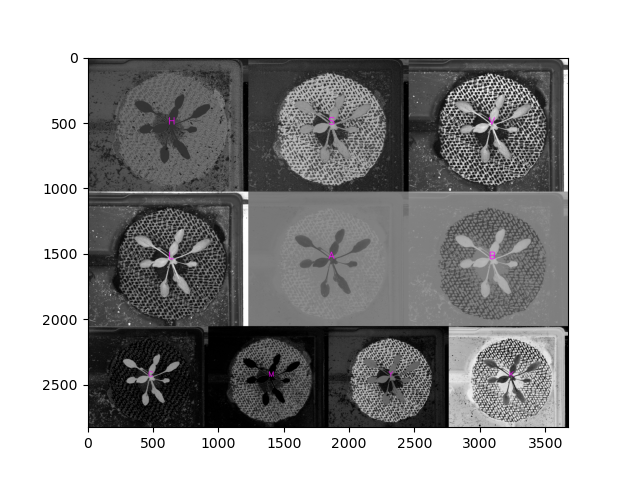

In [28]:
cs = pcv.visualize.colorspaces(rgb_img=rgb_img,
                               original_img=False)

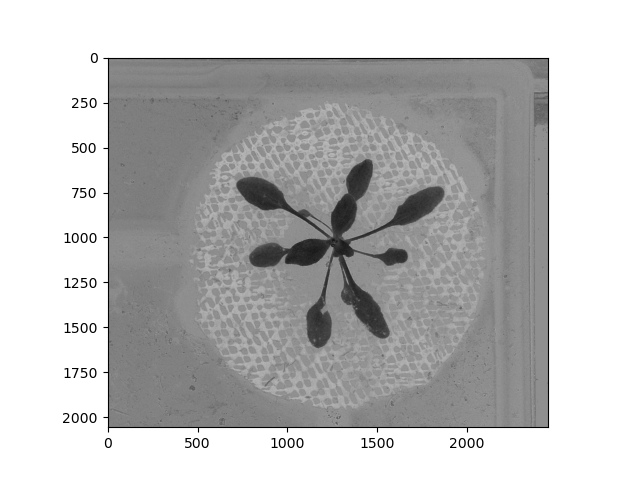

In [29]:
achannel = pcv.rgb2gray_lab(rgb_img=rgb_img,channel='a')

In [30]:
# Let's plot a histogram of all the values of this image
hist = pcv.visualize.histogram(img=achannel, bins = 100)

alt.Chart(...)

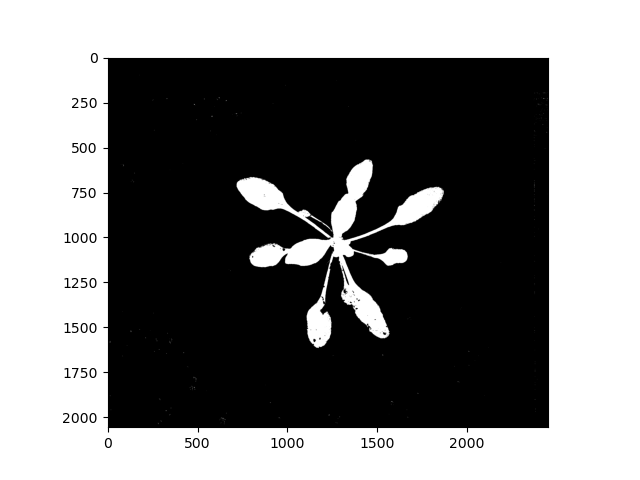

In [31]:
bin_plant = pcv.threshold.binary(gray_img=achannel, threshold=100, object_type="dark")

In [32]:
np.count_nonzero (bin_plant)

269366

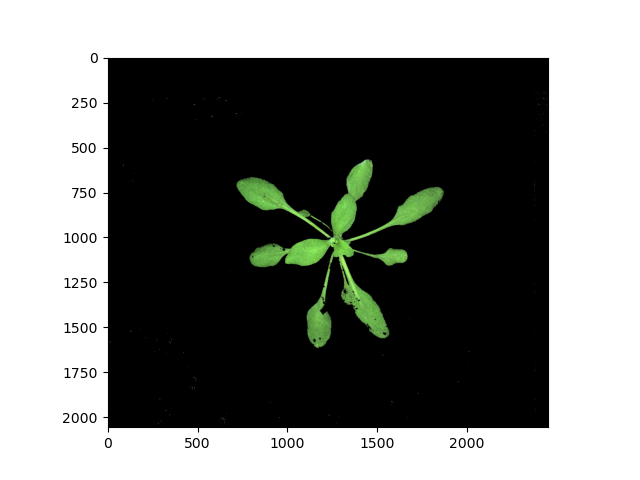

In [33]:
masked = pcv.apply_mask(img=rgb_img, mask=bin_plant,mask_color='black')

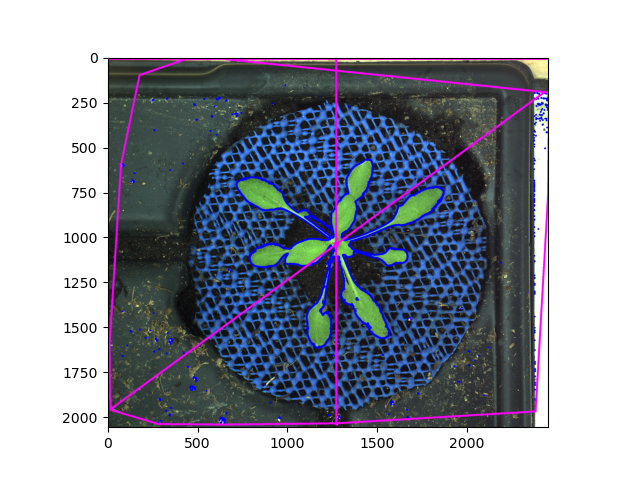

In [34]:
shape_image=pcv.analyze.size(img=rgb_img, labeled_mask=bin_plant, n_labels=1, label=None)

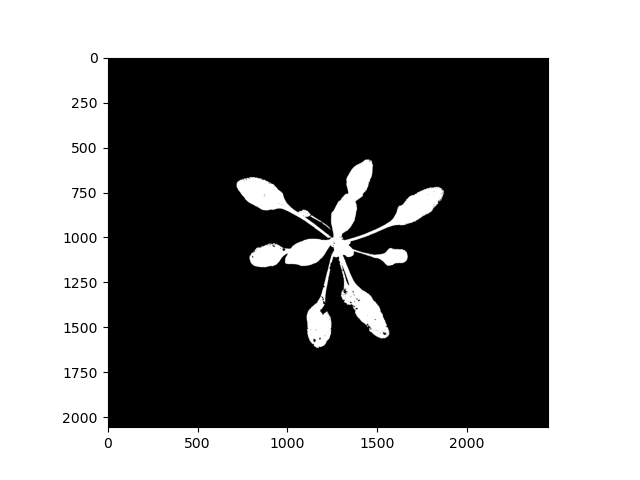

In [35]:
filled = pcv.fill(bin_plant, 100)

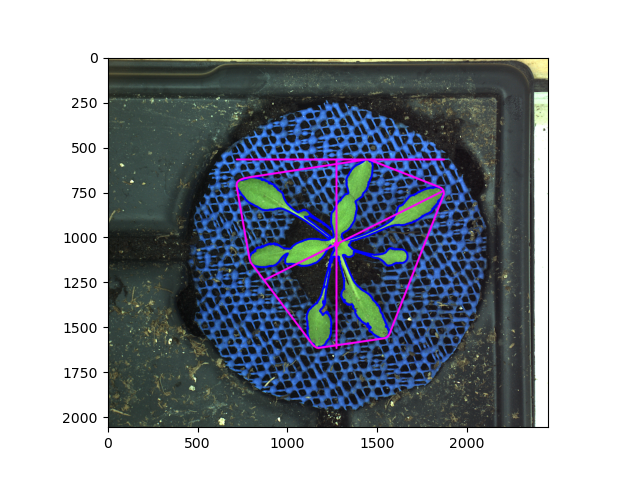

In [42]:
shape_image=pcv.analyze.size(img=rgb_img, labeled_mask=filled, n_labels=1, label='plant')

In [44]:
plant_area = pcv.outputs.observations['plant_1']['area']['value']
plant_area

268314.0